## **in-vehicle coupon recommendation Data Set**
In this dataset, the samples of driving scenarios are having the destination, current time, weather, passenger, etc., and then ask the person whether the person will accept the coupon if he is the driver or not. 

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.metrics import log_loss, plot_confusion_matrix, classification_report, r2_score, accuracy_score, roc_auc_score

## Loading vehicle coupon recommendation Data Set


In this dataset, we have to classify whether a person accepts coupon or not based on some circumstances/instances in the form of features

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Tasks/task(ICA)/in-vehicle-coupon-recommendation.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


### Some basic operations on datasets

In [3]:
#shape of dataset; rows and columns we have
data.shape

(12684, 26)

## Exploratory Data Analysis
Let's dive deep into the dataset to understand the most approriate features that can be responsible for the classification

In [4]:
#basic info of datasets; instances of which dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Attribute Information:

- destination: No Urgent Place, Home, Work
- passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- weather: Sunny, Rainy, Snowy
- temperature:55, 80, 30
- time: 2PM, 10AM, 6PM, 7AM, 10PM
- coupon: Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant(20 to 50 dollars)
- expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
- gender: Female, Male
- age: 21, 46, 26, 31, 41, 50plus, 36, below21
- maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
- has_Children:1, 0
- education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
- occupation: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- income: (in dollars) 37500 - 49999, 62500 - 74999, 12500 - 24999, 75000 - 87499,
50000 - 62499, 25000 - 37499, 100000 or More, 87500 - 99999, Less than 12500
- Bar: never, less1, 1 to 3, gt8, nan4~8 (feature meaning: how many times do you go to a bar every month?)
- CoffeeHouse: never, less1, 4 to 8, 1 to 3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
- CarryAway:n4 to 8, 1 to 3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
- RestaurantLessThan20: 4 to 8, 1 to 3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than 20 dollars every month?)
- Restaurant20To50: 1 to 3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of 20 to 50 dollars every month?)
- toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant or bar for using the coupon is greater than 15 minutes)
- toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant or bar for using the coupon is greater than 25 minutes)
- direction_same:0, 1 (feature meaning: whether the restaurant or bar is in the same direction as your current destination)
- direction_opp:1, 0 (feature meaning: whether the restaurant or bar is in the same direction as your current destination)
- Y:1, 0 (whether the coupon is accepted); 1 denotes accepted, 0 denotes unaccepted

### Identifying unique values in each attribute

In [5]:
features = [col for col in data.columns]
uniques = dict()
for col in features:
  uniques[col] = [val for val in data[col].unique()]
print(uniques)

{'destination': ['No Urgent Place', 'Home', 'Work'], 'passanger': ['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], 'weather': ['Sunny', 'Rainy', 'Snowy'], 'temperature': [55, 80, 30], 'time': ['2PM', '10AM', '6PM', '7AM', '10PM'], 'coupon': ['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)'], 'expiration': ['1d', '2h'], 'gender': ['Female', 'Male'], 'age': ['21', '46', '26', '31', '41', '50plus', '36', 'below21'], 'maritalStatus': ['Unmarried partner', 'Single', 'Married partner', 'Divorced', 'Widowed'], 'has_children': [1, 0], 'education': ['Some college - no degree', 'Bachelors degree', 'Associates degree', 'High School Graduate', 'Graduate degree (Masters or Doctorate)', 'Some High School'], 'occupation': ['Unemployed', 'Architecture & Engineering', 'Student', 'Education&Training&Library', 'Healthcare Support', 'Healthcare Practitioners & Technical', 'Sales & Related', 'Management', 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical

In [6]:
#dataset statistics
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Observing above statistics, we cannot conclude that the dataset is clean and noise-free, as only few features are described whereas we have 26 features in total (25 attributes + 1 target feature)

### Checking for missing values

In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

We can see that some features have **NaN** values which may create disturbance in the performance of algorithmic models. These are needed to be either removed or replaced with some appropriate values

### Fixing Nan values 

In [8]:
data = data.drop('car', axis=1)
cols=[]
features = [col for col in data.columns]
for col in features:
  if data[col].isna().sum()>0 & data[col].isna().sum()<6000:
    data[col] = data[col].fillna(data[col][data[col].isna()==False].mode()[0])
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In above cell, we have removed 'car' feature as it contained so many null values near about equal to the total samples. In other features containing NaN values, we have replaced those values with the mode of that particular feature, since we are working on classification dataset.

In [9]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Now, the dataset is free from null values

### Label Encoding

We have so many features of dtype='object' that are needed to be encoded to either integer or float format

In [10]:
for col in features:
  if data[col].dtypes=='O':
    data[col] = LabelEncoder().fit_transform(data[col])
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,1,5,24,3,4,4,0,1,0,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,1,5,24,3,4,4,0,1,0,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,1,5,24,3,4,4,0,1,0,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,0,3,1,5,24,3,4,4,0,1,0,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,0,3,1,5,24,3,4,4,0,1,0,1,1,0,0,1,0


### Understanding target feature

No handles with labels found to put in legend.


1    7210
0    5474
Name: Y, dtype: int64


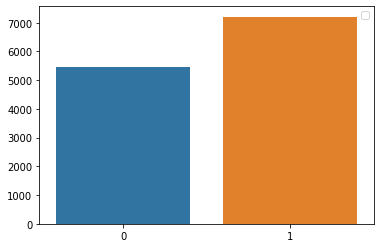

In [11]:
target = 'Y'
sns.barplot(x = (data[target].unique()), y = data[target].value_counts().values)
plt.legend()
print(data[target].value_counts())


In total, we have 2 classes in target features('Y')


*   1; representes the coupon will be accepted
*   0; representes the coupon will not be accepted

Here, we have observed that we have more instances of the scenario where the coupon will be accepted.



### Exploring all features

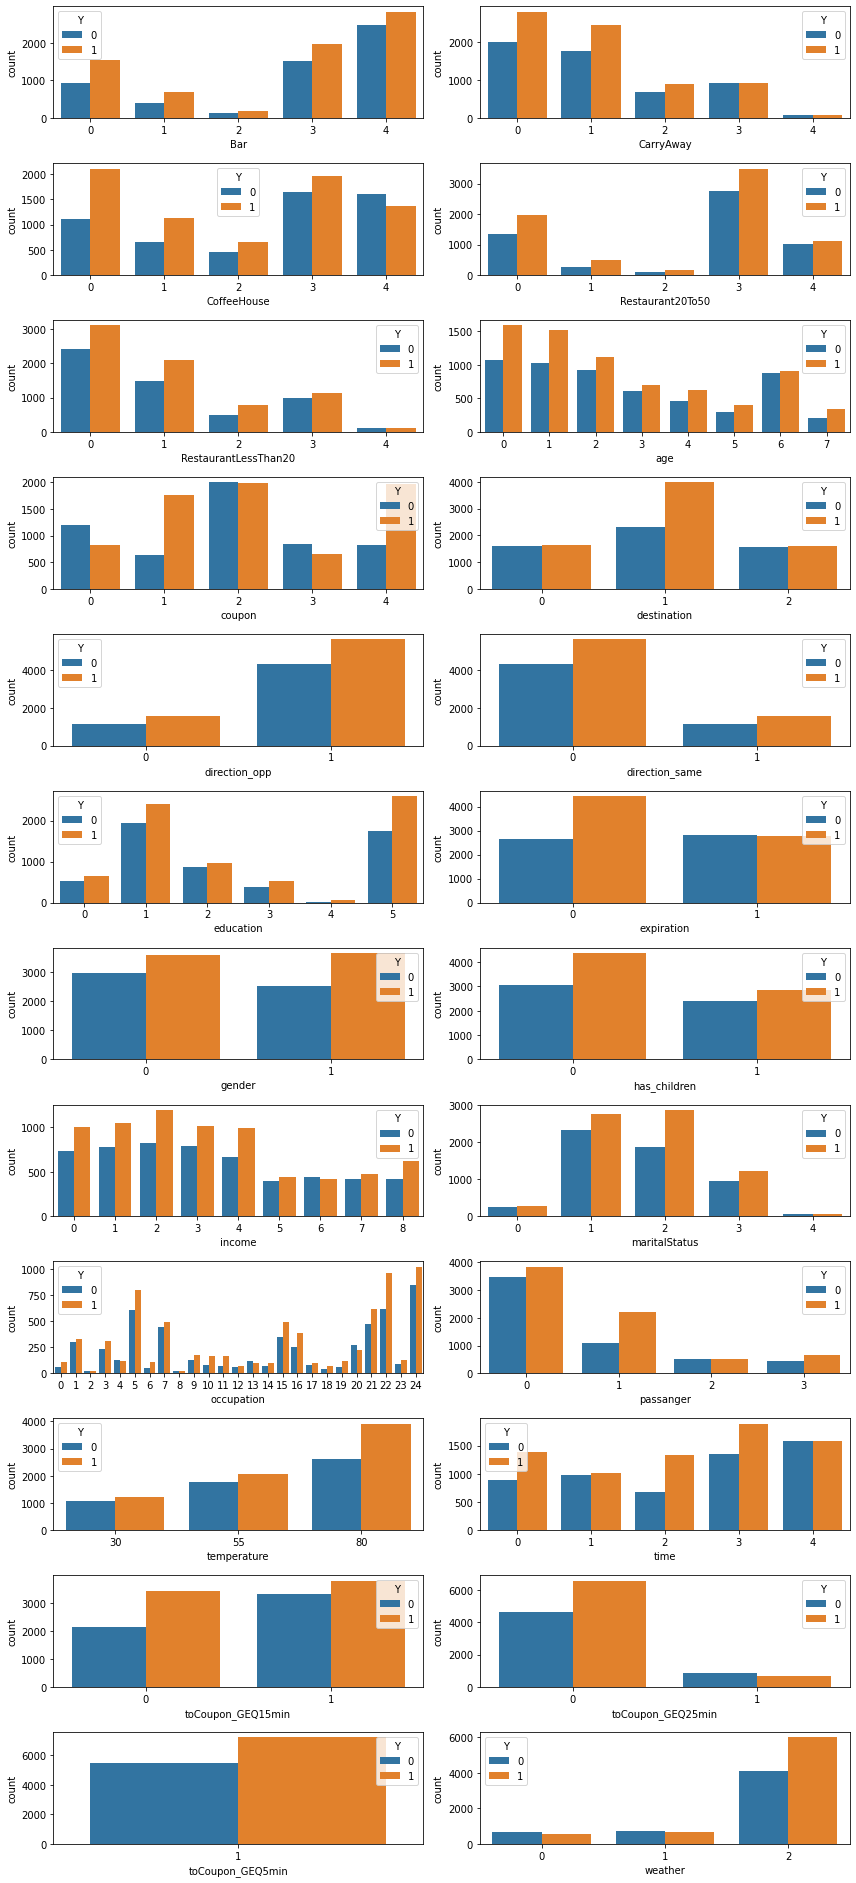

In [12]:
plt.figure(figsize = (12,28))
for a, col in enumerate(data.columns.difference([target])):
    plt.subplot(13, 2, a+1)
    plt.subplots_adjust(wspace = .5, hspace = 1)
    sns.countplot(x = col, data = data, hue = target)
    plt.tight_layout()


        

### Features observation:
- People visits the bar rarely or never, therefore they accepts coupon 
- many people don't prefer to go coffee house but they accepts coupon
- younger people whose age is arounng 20-40 accepts coupon
- Acceptance of coupons also depending upon the weather condition; especially in snowy weather
- people who are singles or married accepts the coupon
- people who are alone accepts the coupon, etc

There are many more features all seems important for the clasification or training of model but to reduce the overfitting, we are going to select a subset of most relevant features,

## Feature Selection

In [13]:
#selecting most relevant features from classification dataset
X = data.drop(target, axis=1)
y = data[target]
bestfeatures = ExtraTreesClassifier()
bestfeatures.fit(X,y)
feat_importances = pd.Series(bestfeatures.feature_importances_,index=X.columns)
best_features = feat_importances.nlargest(16)
best_features = [feat for feat in best_features.index]
bestfeatures_data = data[best_features]
bestfeatures_data[target] = data[target]
bestfeatures_data = shuffle(bestfeatures_data)    
bestfeatures_data.reset_index(inplace=True, drop=True)

bestfeatures_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,coupon,occupation,income,CoffeeHouse,age,time,Bar,education,CarryAway,RestaurantLessThan20,Restaurant20To50,maritalStatus,temperature,passanger,expiration,destination,Y
0,4,21,3,3,0,2,4,3,1,1,3,3,55,3,1,1,1
1,2,3,6,3,3,0,3,1,1,0,0,1,80,0,0,1,1
2,2,24,3,4,6,0,4,5,1,0,3,0,55,0,0,1,0
3,0,5,4,4,0,4,4,2,0,3,4,2,55,0,0,2,0
4,2,11,8,0,7,2,4,5,3,1,3,2,30,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,1,0,0,3,0,3,1,1,0,0,1,80,0,0,1,0
12680,1,21,2,3,5,0,3,5,0,3,4,1,80,2,1,1,1
12681,4,24,0,3,5,2,4,2,3,0,3,3,55,3,1,1,1
12682,4,24,1,3,1,0,4,5,0,1,3,3,80,3,1,1,1


Using feature selection, we have selected 16 most relevant features from the dataset and prepared a dataframe along with target feature.

### Splitting dataset into training and testing data

In [14]:
X = bestfeatures_data.drop(target, axis=1)
y = bestfeatures_data[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Preparing models

### Decision Tree Classifier

In [16]:
#model instatiation and fitting
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Decision Tree Classifier prediction

In [17]:
#prediction over training data
tree_train_pred = tree_classifier.predict(X_train)

#prediction over testing data
tree_test_pred = tree_classifier.predict(X_test)

### Decision Tree Classifier's Evaluation

In [18]:
#log_loss estimation
tree_logloss = log_loss(y_test, tree_classifier.predict_proba(X_test))

In [19]:
print("Model Performance")
print("--------------------------------------------")
print("Train Dataset")
print("Accuracy : ", accuracy_score(y_train, tree_train_pred))
print("AUC      : ", roc_auc_score(y_train, tree_train_pred))

print("--------------------------------------------")

print("Test Dataset")
tree_accuracy = accuracy_score(y_test, tree_test_pred)
print("Accuracy : ", tree_accuracy)
print("AUC      : ", roc_auc_score(y_test, tree_test_pred))

print("--------------------------------------------")
print("Log Loss : ", tree_logloss)

Model Performance
--------------------------------------------
Train Dataset
Accuracy :  0.9892579087415
AUC      :  0.9904633718127961
--------------------------------------------
Test Dataset
Accuracy :  0.6925502562081198
AUC      :  0.6874738789244745
--------------------------------------------
Log Loss :  10.527738021669041


#### Decision Tree Classifier's Confusion Matrix

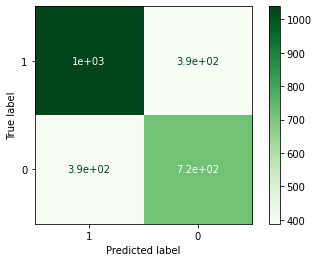

In [20]:
plot_confusion_matrix(estimator=tree_classifier, X=X_test, y_true=y_test, labels=[1,0], cmap='Greens')

Confusion matrix; showing true and false predictive values

#### Decision Tree Classifier's ROC curve

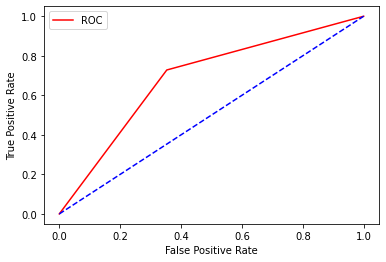

In [21]:
fp, tp, thresh = roc_curve(y_test, tree_test_pred)
plt.plot(fp, tp, color='red', label='ROC', )
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

### XG Boost Classifier

In [22]:
#model instatiation and fitting
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### XG Boost Classifier's Prediction

In [23]:
#prediction over training data
xgb_train_pred = xgb_classifier.predict(X_train)

#prediction over testing data
xgb_test_pred = xgb_classifier.predict(X_test)

### XG Boost Classifier's Evaluation

In [24]:
xgb_logloss = log_loss(y_test, xgb_classifier.predict_proba(X_test))

In [25]:
print("Model Performance")
print("--------------------------------------------")
print("Train Dataset")
print("Accuracy : ", accuracy_score(y_train, xgb_train_pred))
print("AUC      : ", roc_auc_score(y_train, xgb_train_pred))

print("--------------------------------------------")

print("Test Dataset")
xgb_accuracy = accuracy_score(y_test, xgb_test_pred)
print("Accuracy : ", xgb_accuracy)
print("AUC      : ", roc_auc_score(y_test, xgb_test_pred))

print("--------------------------------------------")
print("Log Loss : ", xgb_logloss)

Model Performance
--------------------------------------------
Train Dataset
Accuracy :  0.7320390263131961
AUC      :  0.7160531920339857
--------------------------------------------
Test Dataset
Accuracy :  0.7256602286164762
AUC      :  0.7109023529486038
--------------------------------------------
Log Loss :  0.5581544856439907


#### XG Boost Classifier's Confusion Matrix

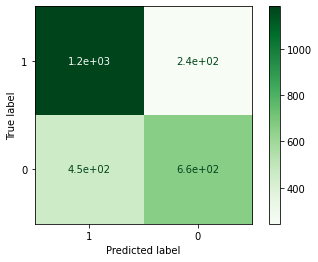

In [26]:
plot_confusion_matrix(estimator=xgb_classifier, X=X_test, y_true=y_test, labels=[1,0], cmap='Greens')

#### XG Boost Classifier's ROC score

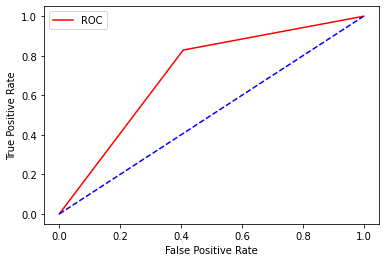

In [27]:
fp, tp, thresh = roc_curve(y_test, xgb_test_pred)
plt.plot(fp, tp, color='red', label='ROC', )
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

### Artificial Neural Network

In [28]:
ann_model = Sequential()
#Adding input layer of ann
ann_model.add(Dense(16, activation = 'relu', input_dim = 16))

#Adding hidden layers
ann_model.add(Dense(32, activation = 'relu'))
ann_model.add(Dense(128, activation = 'relu'))
ann_model.add(Dropout(0.6))
ann_model.add(Dense(256, activation = 'relu'))

#Adding output layer
ann_model.add(Dense(1, activation = 'sigmoid'))

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann_model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/20
318/318 [==============================] - 2s 4ms/step - loss: 0.8837 - accuracy: 0.5210 - val_loss: 0.6819 - val_accuracy: 0.5625
Epoch 2/20
318/318 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.5596 - val_loss: 0.6775 - val_accuracy: 0.5617
Epoch 3/20
318/318 [==============================] - 1s 3ms/step - loss: 0.6765 - accuracy: 0.5829 - val_loss: 0.6683 - val_accuracy: 0.5995
Epoch 4/20
318/318 [==============================] - 1s 3ms/step - loss: 0.6636 - accuracy: 0.5950 - val_loss: 0.6656 - val_accuracy: 0.6031
Epoch 5/20
318/318 [==============================] - 1s 3ms/step - loss: 0.6694 - accuracy: 0.5861 - val_loss: 0.6582 - val_accuracy: 0.5991
Epoch 6/20
318/318 [==============================] - 1s 3ms/step - loss: 0.6565 - accuracy: 0.5998 - val_loss: 0.6571 - val_accuracy: 0.6094
Epoch 7/20
318/318 [==============================] - 1s 3ms/step - loss: 0.6600 - accuracy: 0.5980 - val_loss: 0.6576 - val_accuracy: 0.6027
Epoch 

We have used sigmoid activation function as we are having binary classes

### ANN model's summary

In [29]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 38,321
Trainable params: 38,321
Non-trainable params: 0
____________________________________________________

#### ANN model's Evaluation

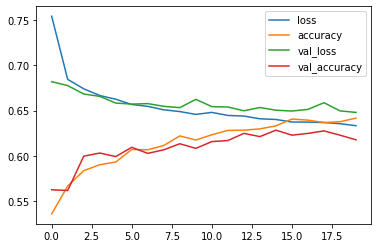

In [30]:
pd.DataFrame(history.history).plot()

Accuracy and loss plot during training and validation. We can observe that we are getting accuracy in increasing format and loss in decreasing format.

In [31]:
ann_accuracy = history.history['accuracy'][-1]
ann_loss = history.history['val_loss'][-1]

## Comparison and Conclusion

#### Accuracy plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


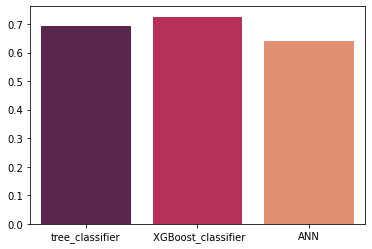

In [32]:
models = ['tree_classifier', ' XGBoost_classifier', 'ANN']
values = [tree_accuracy, xgb_accuracy, ann_accuracy]
bar = sns.barplot(models, values, palette="rocket")

#### Loss plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


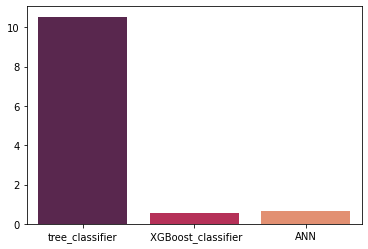

In [33]:
models = ['tree_classifier', ' XGBoost_classifier', 'ANN']
values = [tree_logloss, xgb_logloss, ann_loss]
bar = sns.barplot(models, values, palette="rocket")

XGBoost is having minimum loss whereas Decision Tree classifier is giving so much loss value over this dataset.

## Conclusion

Proposed models were: Decision tree classifier, XG Boost classifier, and Artificial Neural Network. After training, testing, and evaluating all these classifiers and networks, the final comparison plot is created which is concluding that **XG Boost classifier** is performing well with accuracy **72%**(approx) among three proposed models with the minimum log_loss of approx. **0.5**.
Techniques and evaluation shows there might be some issues with the dataset as the techniques are applied properply.
But, for the conclusion XGBoost should be choosen for classification of coupon acceptance.